In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# AVOS

In [2]:
#data = np.loadtxt('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv')
data = pd.read_csv('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv', sep=' ; ')
bad_rows = np.where((data['Longitude'] > 180) | (data['Longitude'] < -180) |
                    (data['Latitude'] > 180) | (data['Latitude'] < -180))[0]

data = data.drop(data.index[bad_rows])
data['Date'] = data['Date'].str.replace('/', '-')
data['Date'] = pd.to_datetime(data['Date'])
data['Wind speed'] = pd.to_numeric(data['Wind speed'])
data['Wind dir'] = pd.to_numeric(data['Wind dir'])

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


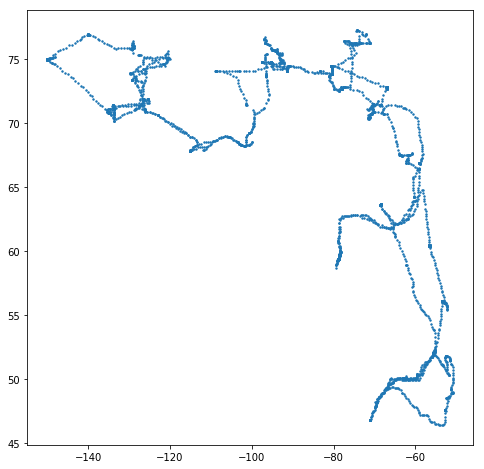

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=2)
plt.show()

In [4]:
from icedef import metocean, test_case

In [5]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

In [6]:
time_frame

(numpy.datetime64('2015-05-06T15:27:39.000000'),
 numpy.datetime64('2015-05-07T06:25:51.000000'))

In [7]:
start_row = np.where(data['Date'] < start_time)[0][-1] + 1
end_row = np.where(data['Date'] > end_time)[0][0] - 1

In [8]:
df = data[start_row : end_row + 1]

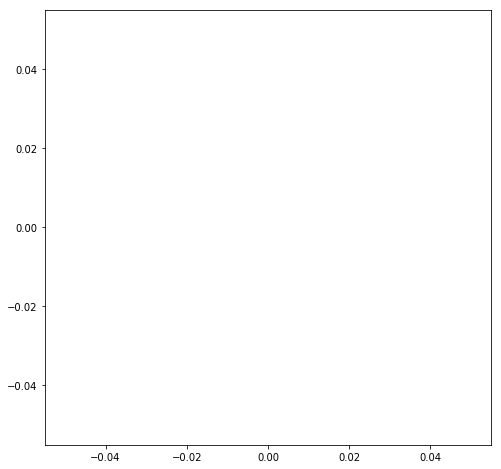

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=2)
plt.show()

In [10]:
df

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure


In [11]:
end_row

448

In [12]:
print(f'Time frame: {time_frame}')
data[start_row - 2 : end_row + 10]

Time frame: (numpy.datetime64('2015-05-06T15:27:39.000000'), numpy.datetime64('2015-05-07T06:25:51.000000'))


,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
447,2015-05-05 22:00:00,46.8,-71.2,20,5,18.2,NaN,-1.5,1019.8
448,2015-05-05 23:00:00,46.8,-71.2,20,11,14.9,NaN,2.3,1020.8
449,2015-07-10 00:00:00,46.8,-71.2,20,2,23.2,NaN,14.3,1011.1
450,2015-07-10 01:00:00,46.8,-71.2,10,5,22.5,NaN,16.0,1011.0
451,2015-07-10 02:00:00,46.8,-71.2,250,1,22.4,NaN,15.0,1010.7
452,2015-07-10 03:00:00,46.8,-71.2,20,4,21.1,NaN,16.2,1010.8
453,2015-07-10 04:00:00,46.8,-71.2,30,4,20.5,NaN,14.3,1010.6
454,2015-07-10 05:00:00,46.8,-71.2,0,0,20.2,NaN,15.0,1010.4
455,2015-07-10 06:00:00,46.8,-71.2,280,2,20.2,NaN,14.2,1010.2
456,2015-07-10 07:00:00,46.8,-71.2,220,1,19.2,NaN,14.0,1010.3


In [24]:
np.where((data['Longitude'] > -60) & (data['Longitude'] < -40) & (data['Latitude'] > 40) & (data['Latitude'] < 60))

(array([  50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
         193,  194,  195,  196,  197, 

In [132]:
df = data[289:314].reset_index(drop=True)

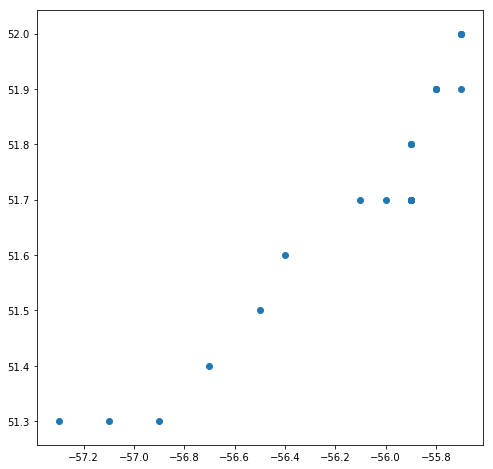

In [133]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

Wind direction is measured in degrees clockwise from True North


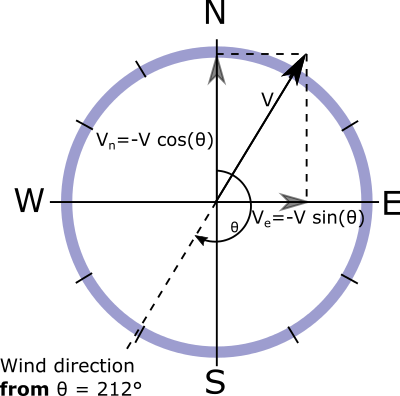

In [134]:
from IPython.display import Image
print('Wind direction is measured in degrees clockwise from True North')
Image(filename='/home/evankielley/Downloads/wind_direction.png') 

In [135]:
atm_data = metocean.NARRAtmosphere((np.datetime64(df['Date'][0]), np.datetime64(df['Date'][len(df)-1])))

In [136]:
def interpolate(reference_points, data_coords, *data_values):
    
    data_interpolator = metocean.Interpolate(data_coords, *data_values)
    
    interpolated_values = np.empty((len(reference_points), len(data_values)))
            
    for i, reference_point in enumerate(reference_points):

        grid_info = metocean.get_grid_info(data_coords)
        
        interpolated_values[i] = data_interpolator.interpolate(reference_point)
                                 
    return interpolated_values


def compare(reference_values, values):
    
    difference = reference_values - values
    
    return difference

In [137]:
reference_points = list(zip(list(df['Date'].values), list(df['Latitude'].values), list(df['Longitude'].values)))
data_coords = atm_data.dataset.time.values, atm_data.dataset.latitude.values, atm_data.dataset.longitude.values
data_values = atm_data.eastward_wind_velocities.values, atm_data.northward_wind_velocities.values

values = interpolate(reference_points, data_coords, *data_values)
reference_values = np.array([-df['Wind speed'].values * np.cos(df['Wind dir'].values), 
                            -df['Wind speed'].values * np.sin(df['Wind dir'].values)]).T

compare(reference_values, values)

array([[ -3.98391875, -13.15730183],
       [ -3.58470624, -12.14122023],
       [  1.596179  ,  32.67522746],
       [  1.84662987,  31.86174255],
       [  1.78857726,  33.02432118],
       [  2.03902746,  32.21083713],
       [  3.54644585,  24.39559152],
       [  3.81985236,  24.48459871],
       [  2.43722718,  34.37401815],
       [  0.93284558,  10.33452019],
       [ 23.52733891,  -9.98769687],
       [  3.20587021,  32.1632938 ],
       [ -2.30828912, -11.33314406],
       [ -1.99139063, -10.6124687 ],
       [ -2.8987387 , -12.6306292 ],
       [  5.2183346 ,  11.49503583],
       [ -1.81555697, -10.10079566],
       [  3.20524753,  23.87738497],
       [ -8.09707752,  10.61011443],
       [ 18.50247617,  -7.37238271],
       [ 21.38484849, -10.04324017],
       [ 16.28351787,  -4.92005356],
       [ 19.32341138,  -9.09512462],
       [  8.81490217,  14.58891848],
       [ -1.31817134,  -7.11884969]])

# ADCP

In [95]:
import xarray as xr

from urllib.request import urlretrieve

In [112]:
file_loc, message = urlretrieve('http://icedef.munroelab.ca/data/StatoilArcticNet/Leg1_1501_ADCP/an1501_os150bb.nc')

In [165]:
ds = xr.open_dataset(file_loc)

In [144]:
ocean_data = metocean.ECMWFOcean((df['Date'][0], df['Date'][len(df)-1]))

Attempting to download ftp://data.munroelab.ca/pub/ECMWF/ocean/daily/20150429.nc... done.
Attempting to download ftp://data.munroelab.ca/pub/ECMWF/ocean/daily/20150430.nc... done.


In [200]:
depth = 0
arr1 = np.where((ds.u.values[:, depth] > -10) & (ds.u.values[:, depth] < 10))[0]
arr2 = np.where((ds.v.values[:, depth] > -10) & (ds.v.values[:, depth] < 10))[0]
good_indices = np.union1d(arr1, arr2)

ocean_times = np.array([ds.time.values[i] for i in good_indices])
ocean_lats = np.array([ds.lat.values[i] for i in good_indices])
ocean_lons = np.array([ds.lon.values[i] for i in good_indices])
ocean_us = np.array([ds.u.values[i, depth] for i in good_indices])
ocean_vs = np.array([ds.v.values[i, depth] for i in good_indices])

ocean_i, ocean_j = np.where(ocean_times < np.datetime64(df['Date'][0]))[0][-1], \
                   np.where(ocean_times > np.datetime64(df['Date'][len(df)-1]))[0][0]

ocean_reference_coords = list(zip(list(ocean_times[ocean_i : ocean_j]), \
                                  list(ocean_lats[ocean_i : ocean_j]), \
                                  list(ocean_lons[ocean_i : ocean_j])))

ocean_data_coords = ocean_data.dataset.time.values, \
                    ocean_data.dataset.latitude.values, \
                    ocean_data.dataset.longitude.values

ocean_data_values = ocean_data.eastward_current_velocities.values, \
                    ocean_data.northward_current_velocities.values

ocean_values = interpolate(ocean_reference_coords, ocean_data_coords, *ocean_data_values)

ocean_reference_values = np.array((ocean_us[ocean_i : ocean_j], ocean_vs[ocean_i : ocean_j])).T
                            

value_differences = compare(ocean_reference_values, ocean_values)
value_differences

array([[-0.23456427, -0.18175607],
       [-0.20943009, -0.26234386],
       [-0.32981935, -0.4776982 ],
       [-0.327744  , -0.36498421],
       [-0.36354747, -0.3468133 ],
       [-0.35227651, -0.34287008],
       [-0.35104253, -0.323414  ],
       [-0.33027584, -0.32605805],
       [-0.32154908, -0.31468837],
       [-0.35696013, -0.30179907],
       [-0.32870138, -0.30347123],
       [-0.36710436, -0.31133791],
       [-0.3278346 , -0.30975501],
       [-0.30727909, -0.22698204],
       [-0.39984864, -0.28487867],
       [-0.15973666, -0.18923948],
       [-0.21315738, -0.20609183],
       [-0.2719904 , -0.20218586],
       [-0.04752346,  0.00155295],
       [ 0.11233572, -0.05923709],
       [ 0.00756088, -0.15296241],
       [ 0.19690818,  0.02020878],
       [ 0.1878784 ,  0.02407629],
       [ 0.15977214,  0.11813043],
       [ 0.13697912,  0.35999336],
       [ 0.36650477,  0.34378232],
       [ 0.10423589,  0.13668424],
       [ 0.10735302,  0.04780083],
       [-0.05356103,

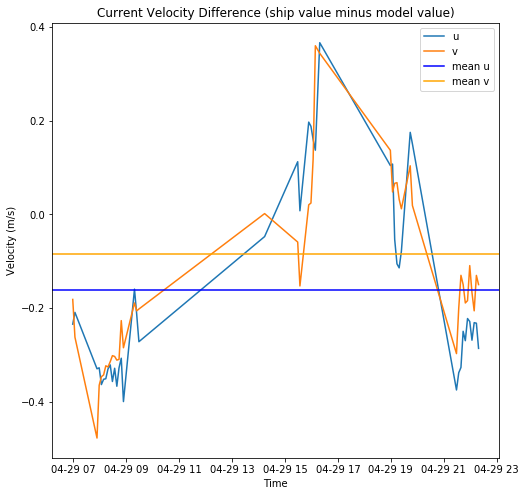

In [222]:
plt.figure(figsize=(8, 8))
plt.plot(ocean_times[ocean_i : ocean_j], value_differences[:, 0], label='u')
plt.plot(ocean_times[ocean_i : ocean_j], value_differences[:, 1], label='v')
plt.axhline(np.mean(ocean_values[:, 0]), label='mean u', color='blue')
plt.axhline(np.mean(ocean_values[:, 1]), label='mean v', color='orange')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Current Velocity Difference (ship value minus model value)')
plt.legend()
plt.show()

In [225]:
ds.depth.values[0]

array([ 23.19,  31.19,  39.19,  47.19,  55.19,  63.19,  71.19,  79.19,
        87.19,  95.19, 103.19, 111.19, 119.19, 127.19, 135.19, 143.19,
       151.19, 159.19, 167.19, 175.19, 183.19, 191.19, 199.19, 207.19,
       215.19, 223.19, 231.19, 239.19, 247.19, 255.19, 263.19, 271.19,
       279.19, 287.19, 295.19,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan], dtype=float32)